## 基本原理

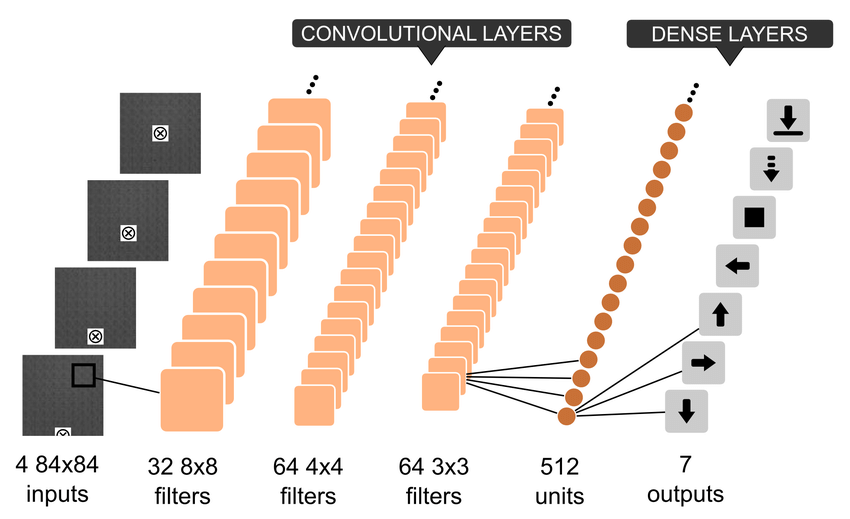

## 游戏环境测试

In [14]:
import numpy as np
import time
from itertools import count
from IPython import display
import matplotlib.pyplot as plt

from screen_convert import SimpleConverter
from state_gen import StackStateGenerator
from gym_super_mario_bros.actions import COMPLEX_MOVEMENT

from env_factory import EnvFactory

In [45]:
screen_convert = SimpleConverter(resize_min=(84, 84))
state_generator = StackStateGenerator(screen_converter=screen_convert)

### 可选动作

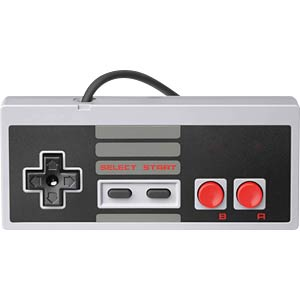

In [2]:
COMPLEX_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left'],
 ['left', 'A'],
 ['left', 'B'],
 ['left', 'A', 'B'],
 ['down'],
 ['up']]

### 环境输入输出

In [3]:
CUSTOM_MOVEMENTS = [
    ['right'],
    ['right', 'A']
]
env_factory = EnvFactory(env_id="SuperMarioBros-1-1-v0",
                        movements=CUSTOM_MOVEMENTS,
                        skip_frames=4,
                        num_stack=4)

In [31]:
env = env_factory.gen_env(random_seed=42)

observation = env.reset()

/home/vitor/workspace/py_projects/pytorch_projects/venv/lib/python3.10/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment SuperMarioBros-1-1-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/home/vitor/workspace/py_projects/pytorch_projects/venv/lib/python3.10/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/vitor/workspace/py_projects/pytorch_projects/venv/lib/python3.10/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [23]:
observation

In [30]:
# Frames, Height, Width, Channel(Red, Green, Blue)
observation.shape

(4, 240, 256, 3)

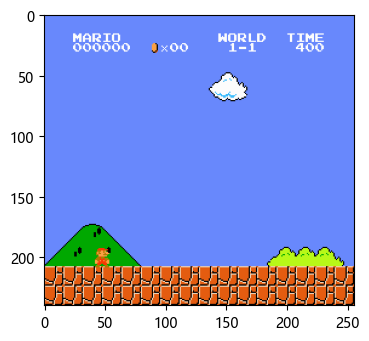

In [42]:
plt.figure(figsize=(4, 4))
plt.imshow(observation[3], vmin=0, vmax=255)

In [79]:
oneshot_action = env.action_space.sample()
oneshot_action

1

In [101]:
observation, reward, done, info = env.step(oneshot_action)

In [102]:
reward

7.0

In [103]:
done

False

In [104]:
info

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 0,
 'stage': 1,
 'status': 'small',
 'time': 399,
 'world': 1,
 'x_pos': 65,
 'y_pos': 143}

In [105]:
oneshot_state = state_generator.gen_state(env=env, frames=observation)
oneshot_state

tensor([[[0.5476, 0.5476, 0.5476,  ..., 0.5476, 0.5476, 0.5476],
         [0.5476, 0.5476, 0.5476,  ..., 0.5476, 0.5476, 0.5476],
         [0.5476, 0.5476, 0.5476,  ..., 0.5476, 0.5476, 0.5476],
         ...,
         [0.4862, 0.4862, 0.4862,  ..., 0.4862, 0.5114, 0.4862],
         [0.7494, 0.3820, 0.3579,  ..., 0.2038, 0.4862, 0.4862],
         [0.4515, 0.4515, 0.1305,  ..., 0.7431, 0.4515, 0.0107]],

        [[0.5476, 0.5476, 0.5476,  ..., 0.5476, 0.5476, 0.5476],
         [0.5476, 0.5476, 0.5476,  ..., 0.5476, 0.5476, 0.5476],
         [0.5476, 0.5476, 0.5476,  ..., 0.5476, 0.5476, 0.5476],
         ...,
         [0.4862, 0.4862, 0.4862,  ..., 0.4862, 0.5114, 0.4862],
         [0.7494, 0.3820, 0.3579,  ..., 0.2038, 0.4862, 0.4862],
         [0.4515, 0.4515, 0.1305,  ..., 0.7431, 0.4515, 0.0107]],

        [[0.5476, 0.5476, 0.5476,  ..., 0.5476, 0.5476, 0.5476],
         [0.5476, 0.5476, 0.5476,  ..., 0.5476, 0.5476, 0.5476],
         [0.5476, 0.5476, 0.5476,  ..., 0.5476, 0.5476, 0.

In [108]:
# Frames, Height, Width
oneshot_state.size()

torch.Size([4, 84, 84])

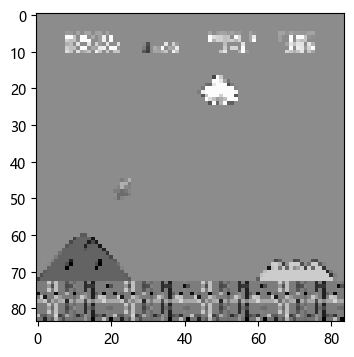

In [110]:
plt.figure(figsize=(4, 4))
plt.imshow(oneshot_state[-1], cmap='gray', vmin=0, vmax=1)

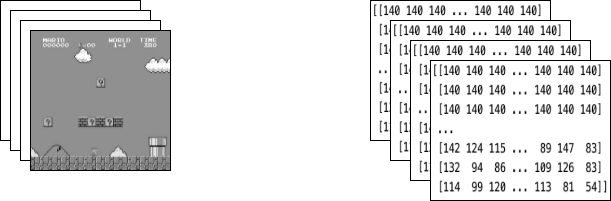

In [111]:
env.reset()
rewards = []
infos = []
states = []

for t in count():
    observation, reward, done, info = env.step(env.action_space.sample())
    states.append(state_generator.gen_state(env=env, frames=observation))
    rewards.append(reward)
    infos.append(info)
    env.render()
    time.sleep(0.018)
    if done:
        break

/home/vitor/workspace/py_projects/pytorch_projects/venv/lib/python3.10/site-packages/gym/core.py:57: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/home/vitor/workspace/py_projects/pytorch_projects/venv/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:280: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(


In [112]:
len(states)

534

In [114]:
done

True

In [113]:
infos[-1]

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 500,
 'stage': 1,
 'status': 'small',
 'time': 294,
 'world': 1,
 'x_pos': 1410,
 'y_pos': 254}

In [115]:
np.sum(rewards)

1247.0

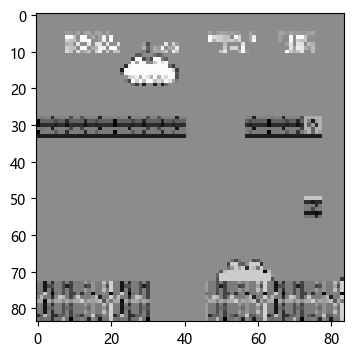

In [116]:
for s in states:
    if s is None:
        continue
    plt.figure(figsize=(4, 4))
    for frame in s:
        plt.imshow(s[-1], cmap='gray', vmin=0, vmax=1)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    plt.pause(0.001)  # pause a bit so that plots are updated
    